In [141]:
import pandas as pd  
import numpy as np
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy import stats

## Vẽ Correlation Matrix

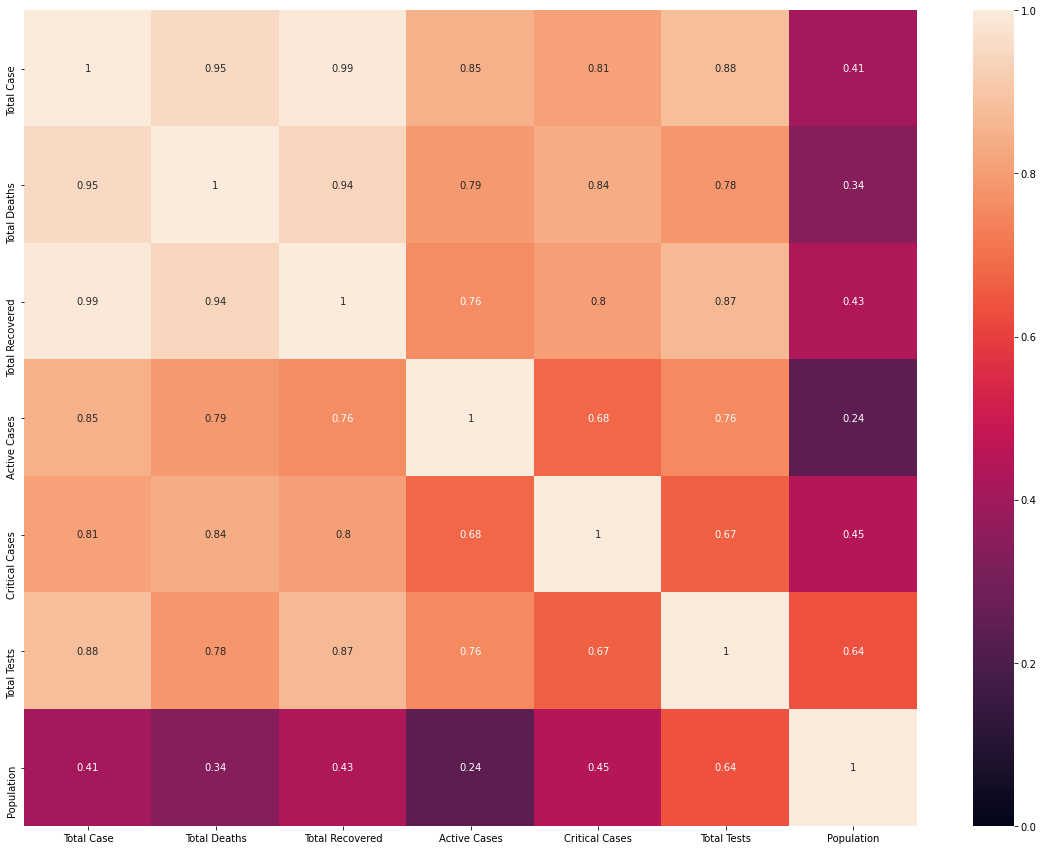

In [142]:
df =pd.read_csv("../data/13-04.csv")

with open("list_attributes.txt") as f:
    attrs = f.readlines()

attrs = [ attr.strip() for attr in attrs]
n_attrs = len(attrs)

plt.subplots(figsize = (20,15))
corr_matrix = df[attrs].corr()
sn.heatmap(corr_matrix, annot=True, vmin = 0, vmax = 1)
plt.show()

## Quan hệ giữa 2 biến

In [143]:
def single_linear_regression(ax, X, Y):
    X = X.values
    Y = Y.values

    w1 = (np.mean(X * Y) - np.mean(X) * np.mean(Y)) / (np.mean(X * X) - np.mean(X) ** 2)
    w0 = np.mean(Y) - w1 * np.mean(X)
    w = np.array([w0, w1])
    one = np.ones(X.shape[0])
    X = np.vstack((one, X))

    t_value = w1 / SE(X, Y, w)
    # p_value = SE(X, Y, w0, w1)
    p_value = (1.0 - stats.t.cdf(t_value, len(Y) - 1)) * 2.0
    adj_r_sqrt = Adjusted_R_squared(X, Y, w)

    # Draw regression line
    draw_line(ax, w, x_min = np.min(X[1]), x_max = np.max(X[1]))
    display_p_value_adj_r_sqrt(ax, p_value, adj_r_sqrt)

    return w, p_value, adj_r_sqrt

    # ax.plot(Xp, Yp)
    # return w0, w1

def draw_line(ax, w, x_min, x_max):
    Xp = np.linspace(x_min, x_max, 100) 
    Yp = w[0] + Xp * w[1]
    ax.plot(Xp, Yp)

def display_p_value_adj_r_sqrt(ax, p_value, adj_r_sqrt):
    p_value = "{:.2e}".format(p_value)
    adj_r_sqrt = round(adj_r_sqrt, 6)
    ax.annotate(f"p-value=" + p_value, (350, 30), xycoords='axes pixels', fontsize=15)
    ax.annotate(r"$R^2_{adj}=$" + f'{adj_r_sqrt}', (350, 5), xycoords='axes pixels', fontsize=15)

def display_title(ax, x, y, w):
    ax.set_title(f"{y} = {round(w[0], 2)} + {x}*{round(w[1], 6)}", fontsize = 20)

def SE(X, Y, w, k = 1):
    Xi = np.array(X[k])
    Yp = w.dot(X)
    n = len(X)
    return math.sqrt(np.sum((Y - Yp) ** 2) / (n - 2)) / math.sqrt(np.sum((Xi - np.mean(Xi)) ** 2))


def RSS(X, Y, w):
    Yp = w.dot(X)
    # res = 0.0
    # for xi, yi in zip(X, Y):
    #     res += (yi - w0 - w1 * xi) ** 2
    return np.sum((Y - Yp)**2)


def TSS(Y):
    return np.sum((Y - np.mean(Y)) ** 2)


def R_quared(X, Y, w):
    return 1 - (RSS(X, Y, w) / TSS(Y))


def Adjusted_R_squared(X, Y, w):
    n = len(Y)
    k = len(w) - 1
    return 1 - (1 - R_quared(X, Y, w)) * (n - 1) / (n - k - 1)


def linear_regression(X, Y):
    one = np.ones(X.shape[1])
    X = np.vstack((one, X))
    A = np.dot(X, X.T)
    b = np.dot(X, Y.T)
    w = np.dot(np.linalg.pinv(A), b)
    # model = sm.OLS(Y, X)
    # results = model.fit()

    # Get parameters, p-value and Adjusted R squared
    # w = results.params
    # p_values = results.pvalues
    # adj_r_sqrt = results.rsquared_adj
    # t_value = w1 / SE(X, Y, w)
    # p_value = SE(X, Y, w0, w1)
    # p_value = (1.0 - stats.t.cdf(t_value, len(Y) - 1)) * 2.0
    adj_r_sqrt = Adjusted_R_squared(X, Y, w)
    return adj_r_sqrt

/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in double_scalars
/home/iris/anaconda3/envs/visualization/lib/python3.6/site-packages/ip

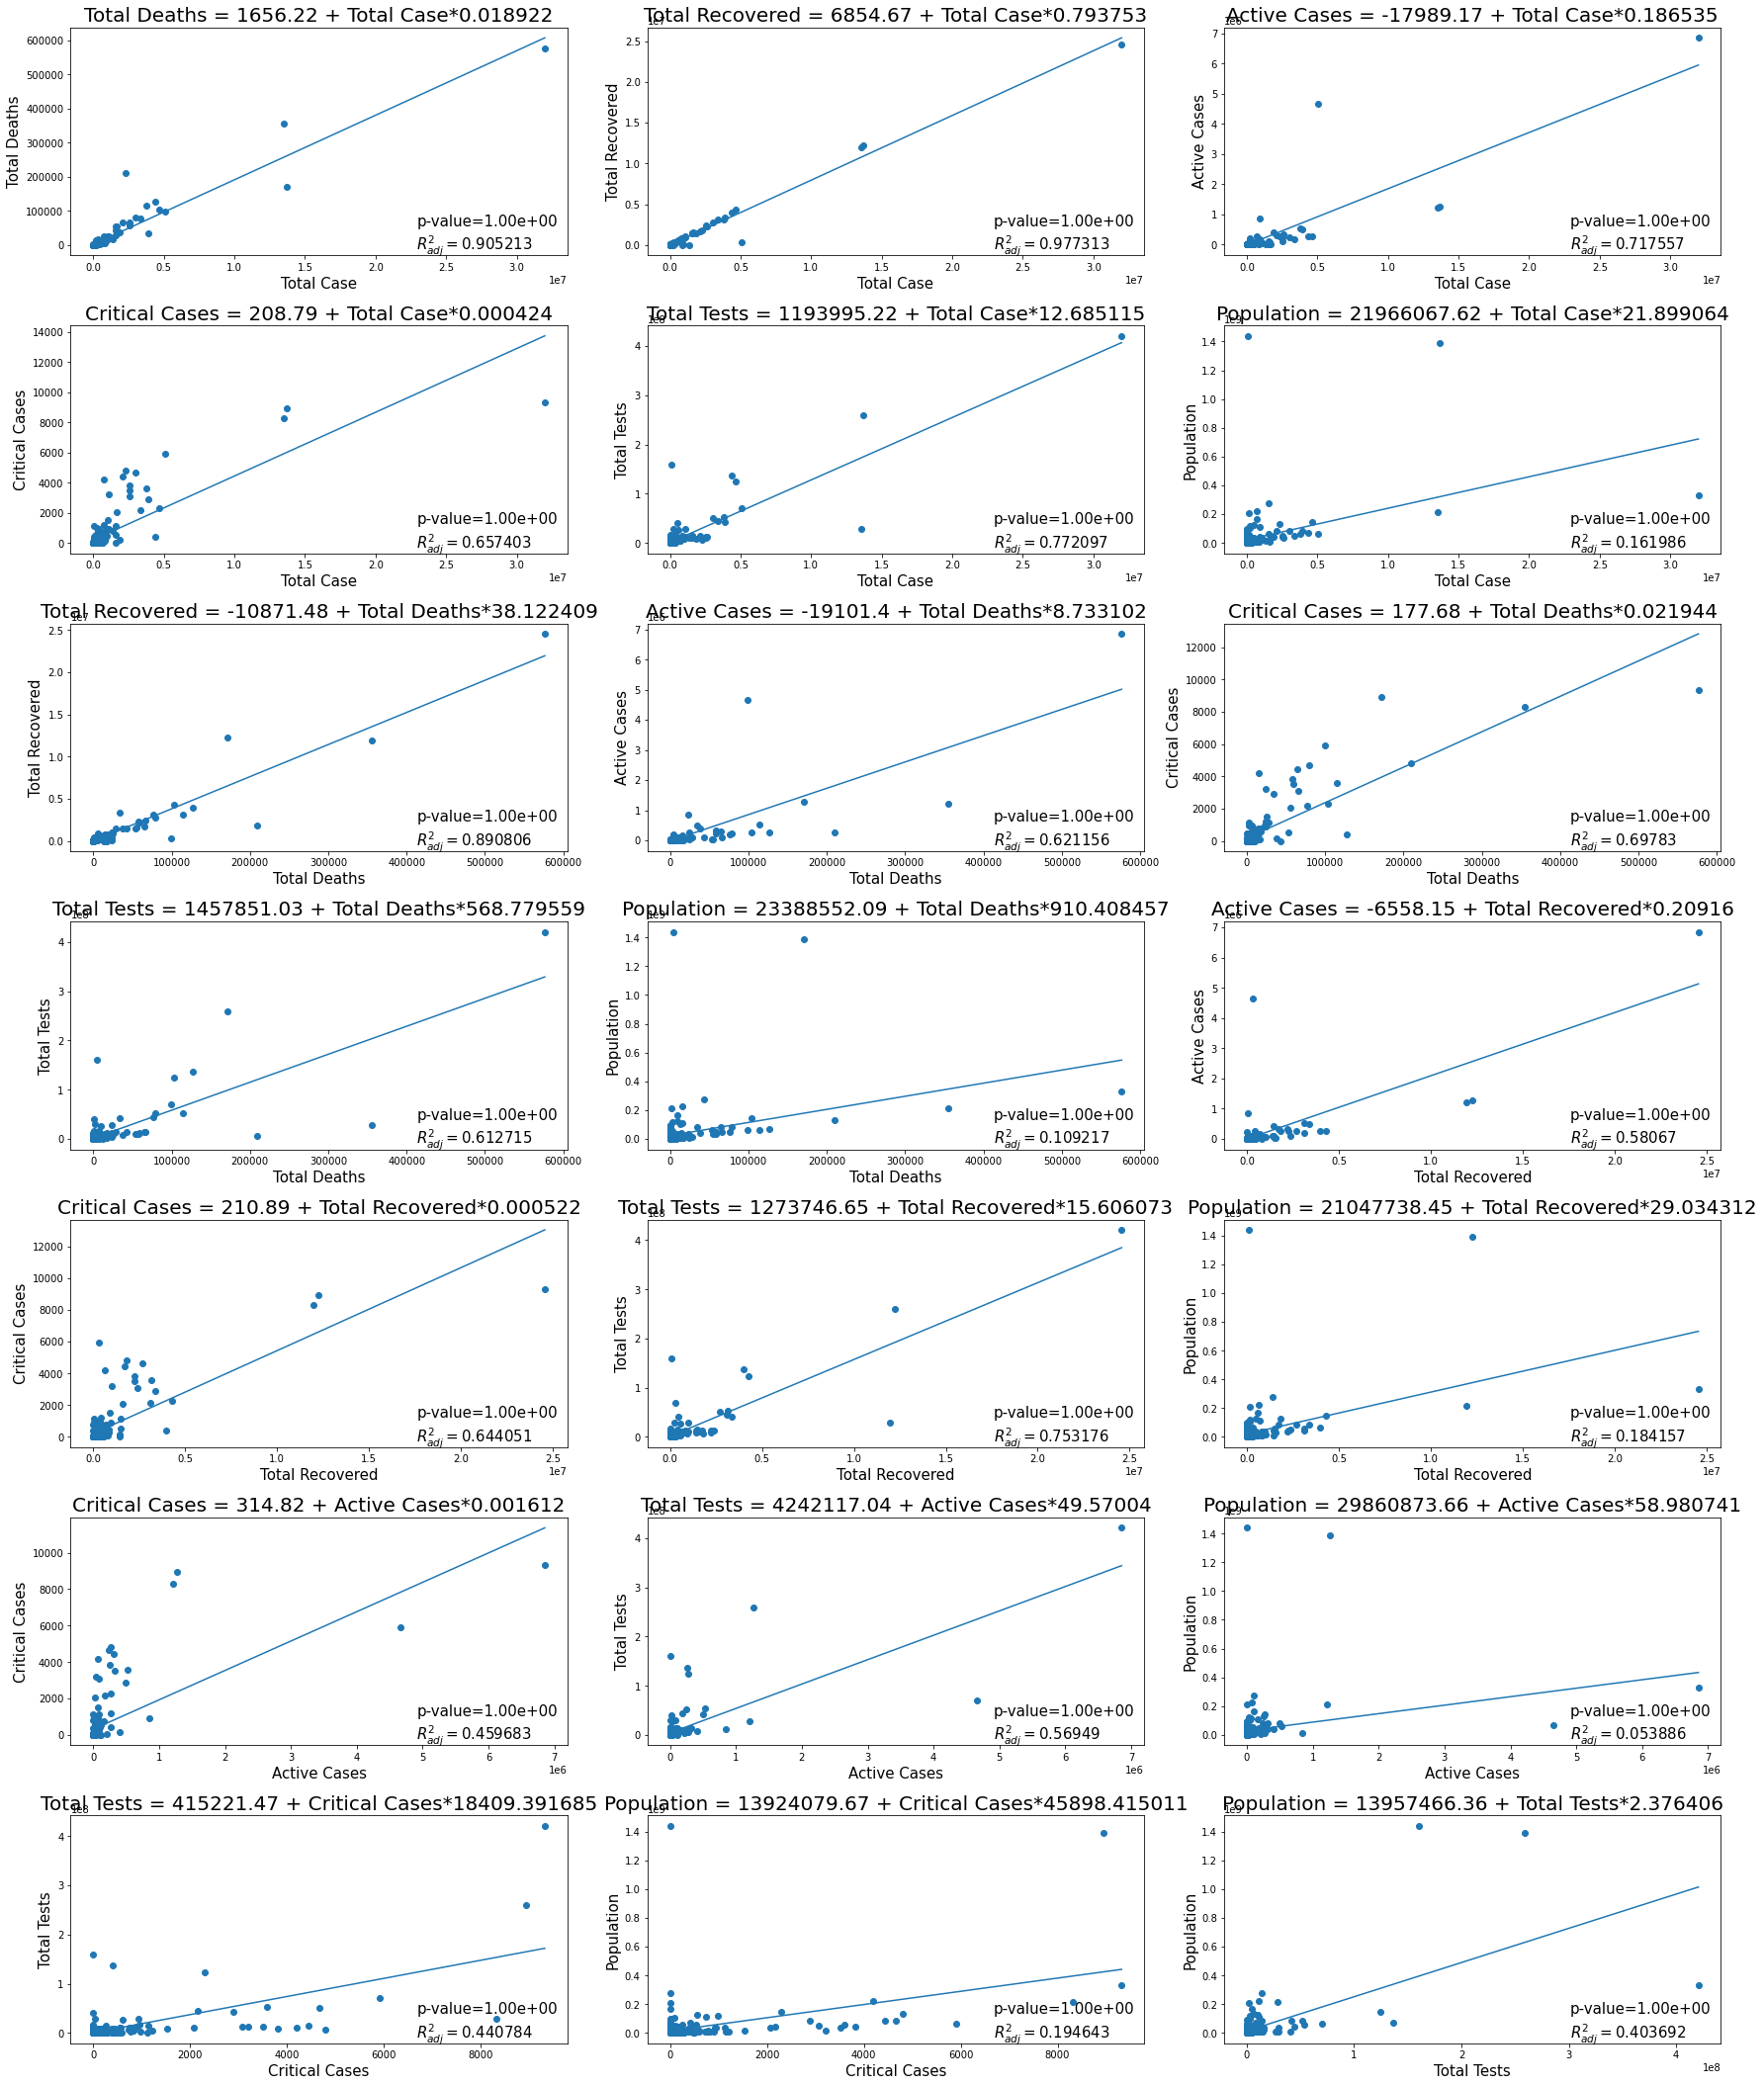

In [144]:
fig, axs = plt.subplots(7,3, figsize=(25,30))
fig.tight_layout(pad=5.0)
cnt = 0
for i in range(n_attrs - 1):
    for j in range(i + 1, n_attrs):
        axs[cnt // 3, cnt % 3].scatter(df[attrs[i]], df[attrs[j]])
        axs[cnt // 3, cnt % 3].set_xlabel(attrs[i], fontsize=15)
        axs[cnt // 3, cnt % 3].set_ylabel(attrs[j], fontsize=15)
        w, p_value, adj_r_sqrt = single_linear_regression(axs[cnt // 3, cnt % 3], df[attrs[i]], df[attrs[j]])
        display_title(axs[cnt // 3, cnt % 3], attrs[i], attrs[j], w)
        cnt+=1
plt.show()

In [145]:
for i in range(n_attrs - 2):
    for j in range(i + 1, n_attrs - 1):
        for k in range(j + 1, n_attrs):
            X1 = df[attrs[i]].values
            X2 = df[attrs[j]].values
            X = np.vstack((X1, X2))
            Y = df[attrs[k]].values
            r_sqrt_adj = linear_regression(X, Y)
            if(r_sqrt_adj >= 0.7):
                print(attrs[i] + ", " + attrs[j] + ", " + attrs[k])
                print(f"adjusted R squared={r_sqrt_adj}")

Total Case, Total Deaths, Total Recovered
adjusted R squared=0.9773204189055205
Total Case, Total Deaths, Active Cases
adjusted R squared=0.7195732586311764
Total Case, Total Deaths, Total Tests
adjusted R squared=0.8009548142861576
Total Case, Total Recovered, Active Cases
adjusted R squared=0.9672743146000476
Total Case, Total Recovered, Total Tests
adjusted R squared=0.771070142052444
Total Case, Active Cases, Total Tests
adjusted R squared=0.771434125058248
Total Case, Critical Cases, Total Tests
adjusted R squared=0.7778422523929489
Total Deaths, Total Recovered, Total Tests
adjusted R squared=0.7641044004155377
Total Recovered, Active Cases, Total Tests
adjusted R squared=0.7729633080349465
Total Recovered, Critical Cases, Total Tests
adjusted R squared=0.7549572622655901


In [146]:
for i in range(n_attrs - 3):
    for j in range(i + 1, n_attrs - 2):
        for k in range(j + 1, n_attrs - 1):
            for t in range(k + 1, n_attrs):
                X1 = df[attrs[i]].values
                X2 = df[attrs[j]].values
                X3 = df[attrs[k]].values
                X = np.vstack((X1, X2, X3))
                Y = df[attrs[t]].values
                r_sqrt_adj = linear_regression(X, Y)
                if(r_sqrt_adj >= 0.7):
                    print(attrs[i] + ", " + attrs[j] + ", " + attrs[k] + ", " + attrs[t])
                    print(f"adjusted R squared={r_sqrt_adj}")

Total Case, Total Deaths, Total Recovered, Active Cases
adjusted R squared=0.9676313162474726
Total Case, Total Deaths, Total Recovered, Total Tests
adjusted R squared=0.8000765216405699
Total Case, Total Deaths, Active Cases, Total Tests
adjusted R squared=0.8000302087694235
Total Case, Total Deaths, Critical Cases, Total Tests
adjusted R squared=0.8005397610609729
Total Case, Total Recovered, Active Cases, Total Tests
adjusted R squared=0.771919367984274
Total Case, Total Recovered, Critical Cases, Total Tests
adjusted R squared=0.7768280484626792
Total Case, Active Cases, Critical Cases, Total Tests
adjusted R squared=0.7771186520511445
Total Deaths, Total Recovered, Active Cases, Total Tests
adjusted R squared=0.7993592417731273
Total Deaths, Total Recovered, Critical Cases, Total Tests
adjusted R squared=0.7631421597544664
Total Recovered, Active Cases, Critical Cases, Total Tests
adjusted R squared=0.7783856302109333


## Stacked bar chart

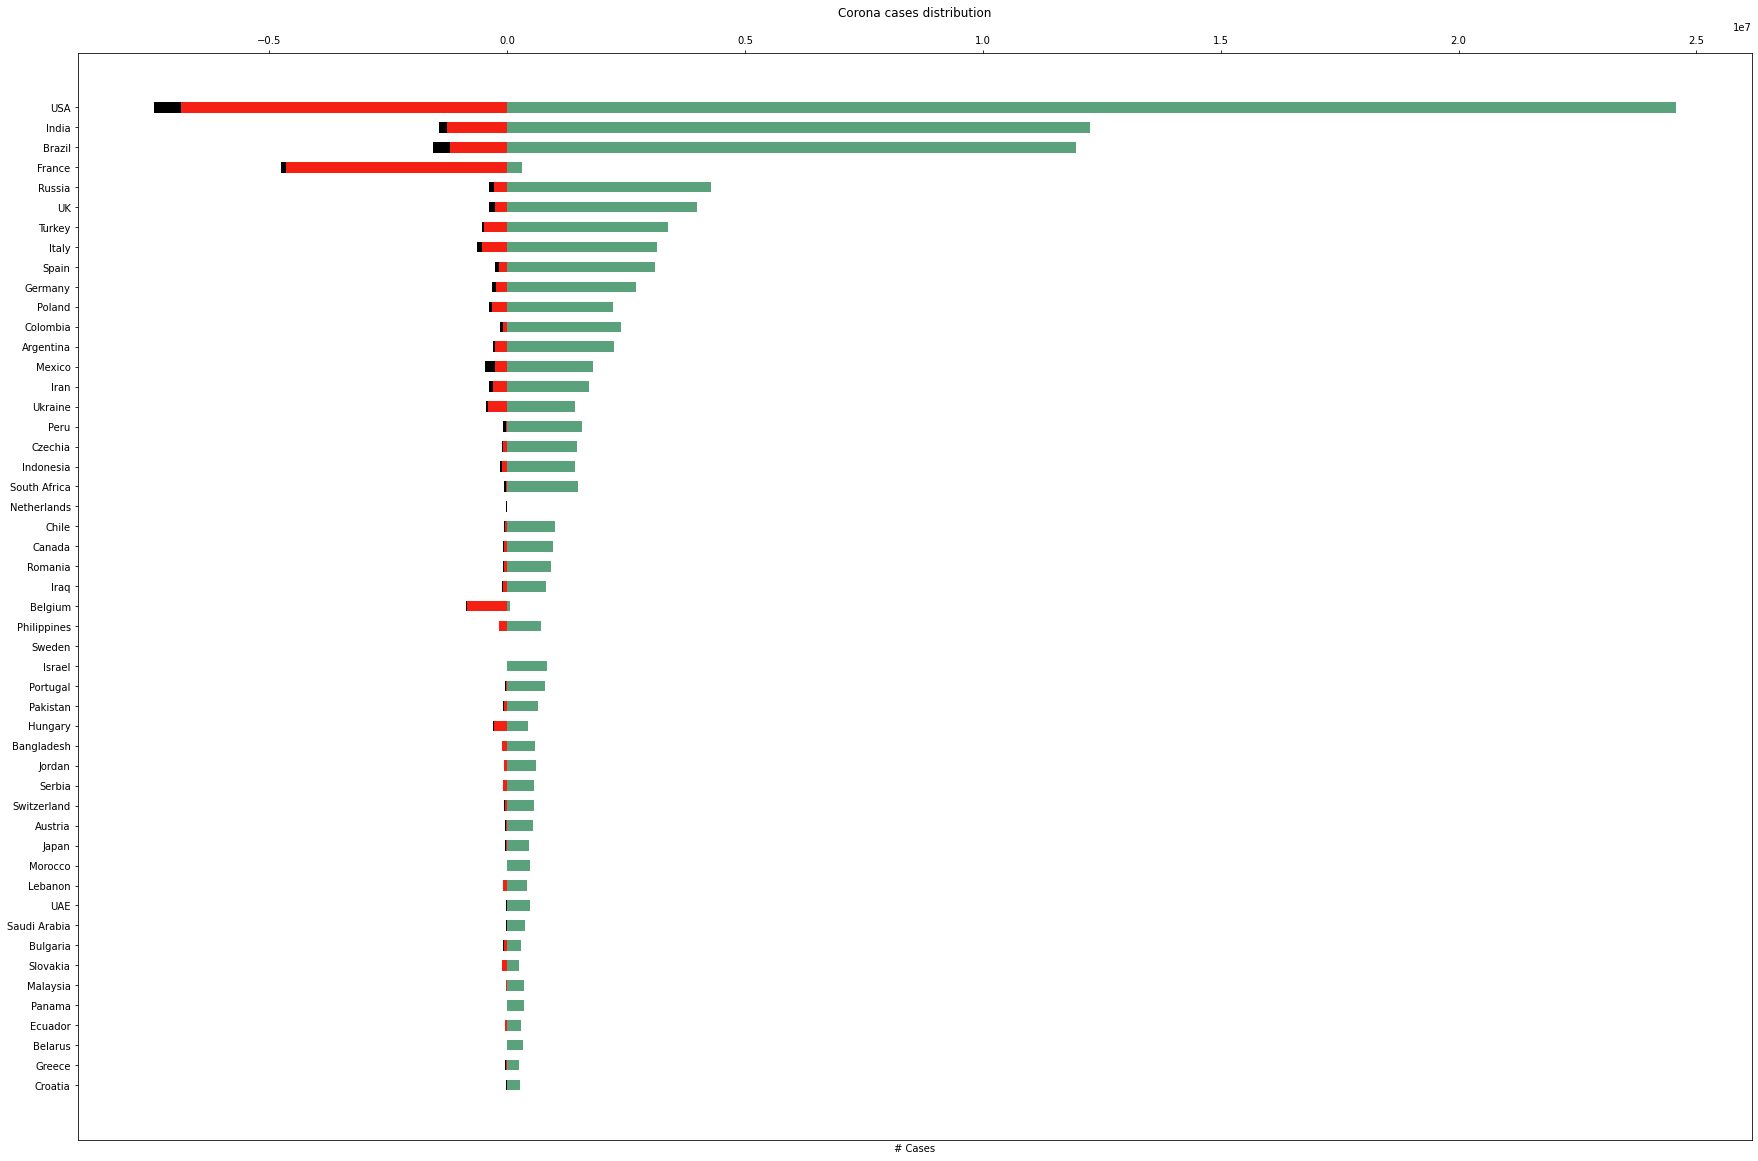

In [147]:
df2 = df[['CountryName', 'Total Deaths', 'Total Recovered', 'Active Cases']].copy()
df2.set_index('CountryName')
df2.loc[:,'Total Deaths'] *= -1
df2.loc[:,'Active Cases'] *= -1
width = 0.5
fig, ax = plt.subplots(figsize=(30,20))
n = 50 # Get first 50 country
df2 = df2.head(n)

ind = np.arange(n) * 1.5

ax.barh(ind, df2['Active Cases'].values, label='Active Cases', align='center', color='#F32013')
ax.barh(ind, df2['Total Deaths'].values, left=df2['Active Cases'].values, label='Total Deaths', align='center', color='000000')
ax.barh(ind, df2['Total Recovered'].values, label='Total Recovered', align='center', color='#5aa27c')
ax.set_yticks(ind)
ax.set_yticklabels(list(df2['CountryName'].values))
ax.invert_yaxis()  # labels read top-to-bottom
ax.xaxis.tick_top()
ax.set_xlabel('# Cases')
ax.set_title('Corona cases distribution')

plt.show()

## World Map  

In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

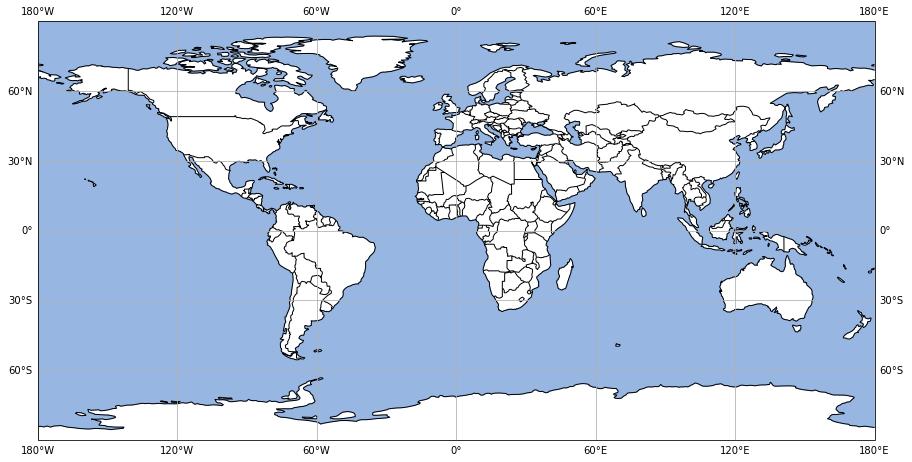

In [11]:
# latitude and longitude with east and west, etc.
plt.figure(figsize=(15, 10))
world_map = plt.axes(projection=ccrs.PlateCarree())
world_map.add_feature(cfeature.OCEAN)
world_map.add_feature(cfeature.BORDERS)
grid_lines = world_map.gridlines(draw_labels=True)
grid_lines.xformatter = LONGITUDE_FORMATTER
grid_lines.yformatter = LATITUDE_FORMATTER
world_map.coastlines()